# Decomposição 

In [5]:
# libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
# Registro de converters para mathplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
df = pd.read_csv('../data/AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('../data/AirPassengers.csv', parse_dates= ['Month'], index_col='Month', date_parser=dateparse)

ts = df['#Passengers']

C:\Users\oderl\AppData\Local\Temp\ipykernel_7668\2534545870.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('../data/AirPassengers.csv', parse_dates= ['Month'], index_col='Month', date_parser=dateparse)


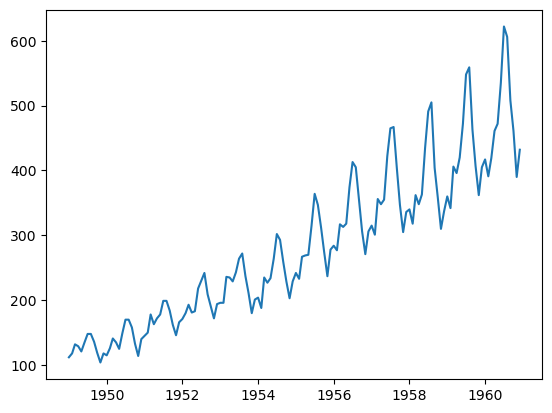

In [7]:
# Visualização da serie temporal
plt.plot(ts)

In [8]:
# Decomposição da serie temporal, criando uma variavel para cada formato
decomposicao = seasonal_decompose(ts)

In [9]:
# Tendencia
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [10]:
# Sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [11]:
# Erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

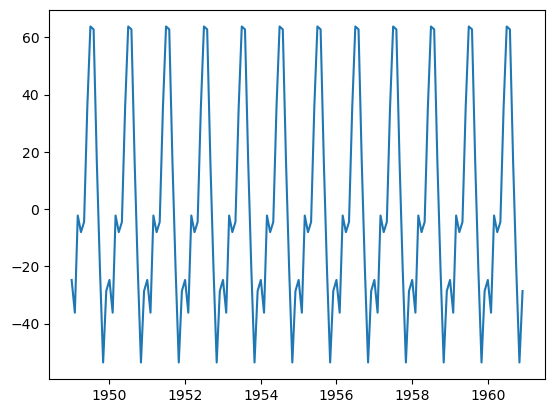

In [12]:
# Visualização de grafico para cada formato da serie temporal
plt.plot(sazonal)

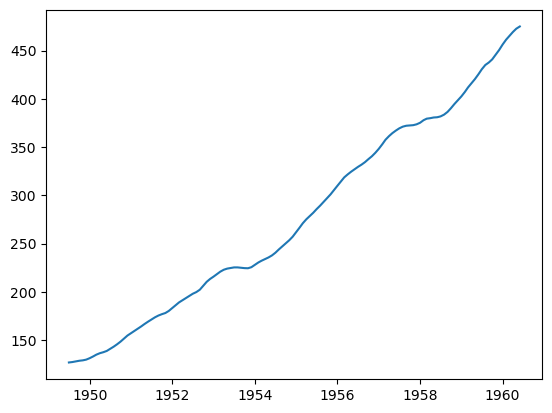

In [13]:
plt.plot(tendencia)

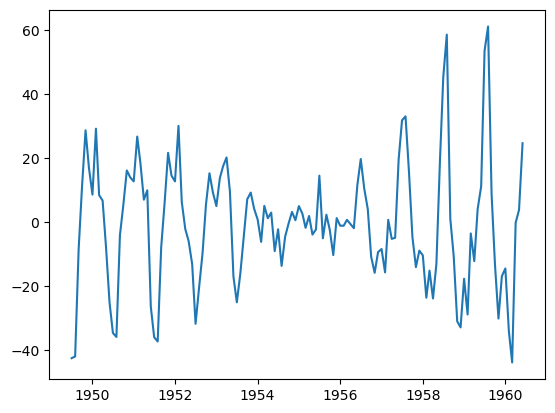

In [14]:
plt.plot(aleatorio)

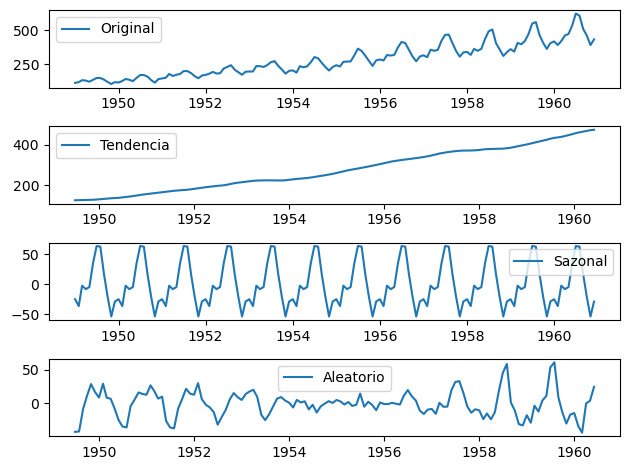

In [15]:
plt.subplot(4,1,1)
plt.plot(ts, label= 'Original')
plt.legend(loc='best')

# Visualização somente da tendencia
plt.subplot(4,1,2)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')

#Visualização apenas do sazonal
plt.subplot(4,1,3)
plt.plot(sazonal, label='Sazonal')
plt.legend(loc='best')

#Visualização do erro (aleatorio)
plt.subplot(4,1,4)
plt.plot(aleatorio, label='Aleatorio')
plt.legend(loc='best')
plt.tight_layout()